# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import random
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
lat_range = (-90, 90)
lng_range = (-180, 180)
cities = pd.DataFrame (columns = ['City_ID','City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'])
ciudad=[]
a=0
for i in range(550):
    lat=(random.uniform(-90, 90))
    lng=(random.uniform(-180, 180))
    city=citipy.nearest_city(lat, lng)
    ciudad.append(city.city_name)
    cities.loc[a,'City'] = city.city_name
    cities.loc[a,'City_ID'] = a
    a=a+1
    
cities
# Output File (CSV)
#output_data_file = "output_data/cities.csv"



,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,avarua,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,port alfred,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,constitucion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,bredasdorp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,nikolskoye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
545,545,grindavik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,546,new norfolk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
547,547,sanford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
548,548,palabuhanratu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
a=0
# Loop through the list of cities and perform a request for data on each
for city in ciudad:
    try:
        response = requests.get(query_url + city).json()
        response
        cities.loc[a,'Lat'] = response['coord']['lat']
        cities.loc[a,'Lng'] = response['coord']['lon']    
        cities.loc[a,'Max Temp'] = response['main']['temp_max']
        cities.loc[a,'Humidity'] = response['main']['humidity']
        cities.loc[a,'Cloudiness'] = response['weather'][0]['description']
        cities.loc[a,'Country'] = response['sys']['country']
        cities.loc[a,'Wind Speed'] = response['wind']['speed']
        cities.loc[a,'Date'] = response['sys']['sunrise']  
        print("ciudad encontrada ")
        a=a+1
    except:
        print("ciudad no encontrada")
        a=a+1
        pass
cities

ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad no encontrada
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad no encontrada
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad no encontrada
ciudad encontrada 
ciudad encontrada 
ciudad

ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad no encontrada
ciudad no encontrada
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad no encontrada
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad no encontrada
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciudad encontrada 
ciud

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,avarua,light rain,CK,1614184461,83,-21.2078,-159.775,28,5.14
1,1,port alfred,light rain,ZA,1614225441,95,-33.5906,26.891,18.33,0.45
2,2,constitucion,clear sky,CL,1614162730,90,-35.3333,-72.4167,14.62,2.06
3,3,bredasdorp,overcast clouds,ZA,1614227030,82,-34.5322,20.0403,17,2.5
4,4,nikolskoye,overcast clouds,RU,1614229586,93,59.7035,30.7861,3,5
...,...,...,...,...,...,...,...,...,...,...
545,545,grindavik,clear sky,IS,1614243006,93,63.8424,-22.4338,0,3.09
546,546,new norfolk,overcast clouds,AU,1614195964,70,-42.7826,147.059,13.89,1.79
547,547,sanford,few clouds,US,1614167715,77,28.8006,-81.2731,21.11,2.06
548,548,palabuhanratu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
# Export file as a CSV, without the Pandas index, but with the header
cities.to_csv("output_data/cities.csv", index=False, header=True)
# Output File (CSV)
#output_data_file = "output_data/cities.csv"

In [42]:
cities2=cities.dropna()

In [43]:
cities2.describe()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,505,505,505,505,505,505,505.0000,505.0000,505.00,505.00
unique,505,275,15,88,271,72,275.0000,275.0000,204.00,163.00
top,547,rikitea,clear sky,US,1614178415,76,-23.1203,-134.9692,15.56,1.54
freq,1,16,138,62,16,31,16.0000,16.0000,19.00,29.00


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [44]:
#  Get the indices of cities that have humidity over 100%..
base_humi100=cities2[cities2['Humidity'] > 100]
index=base_humi100['City_ID']
index

Series([], Name: City_ID, dtype: object)

In [45]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [48]:
clean_city_data=cities2[cities2['Humidity'] < 100]
clean_city_data
# Export file as a CSV, without the Pandas index, but with the header
clean_city_data.to_csv("output_data/clean_city_data.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

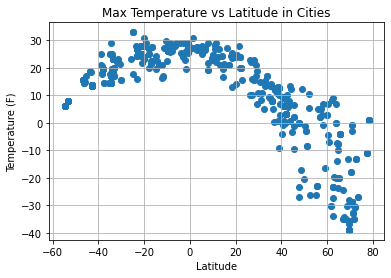

In [49]:
#scatter plot "Max Temperature (F) vs. Latitude"

plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o")

#graph properties
plt.title("Max Temperature vs Latitude in Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot
plt.savefig("Max Temperature_vs_latitude.png")

## Latitude vs. Humidity Plot

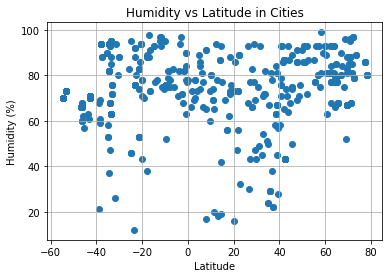

In [50]:
#scatter plot "Humidity (%) vs. Latitude"

plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o")

#graph properties
plt.title("Humidity vs Latitude in Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot
plt.savefig("Humidity_vs_latitude.png")

## Latitude vs. Cloudiness Plot

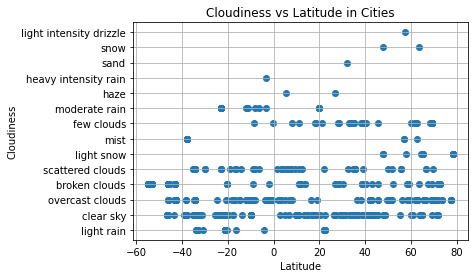

In [51]:
#scatter plot "Cloudiness vs. Latitude"

plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o")

#graph properties
plt.title("Cloudiness vs Latitude in Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot
plt.savefig("Cloudiness_vs_latitude.png")

## Latitude vs. Wind Speed Plot

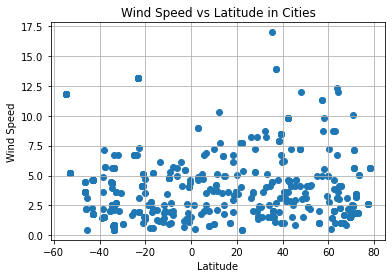

In [52]:

plt.scatter( clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o")

#graph properties
plt.title("Wind Speed vs Latitude in Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot
plt.savefig("WindSpeed_vs_latitude.png")

## Linear Regression

In [53]:


#creating a dataframe for each Hemisphere

North_cities = clean_city_data.loc[(clean_city_data["Lat"]>=0),:]
South_cities = clean_city_data.loc[(clean_city_data["Lat"]<0),:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.77X + 35.21
The correlation factors is -0.85


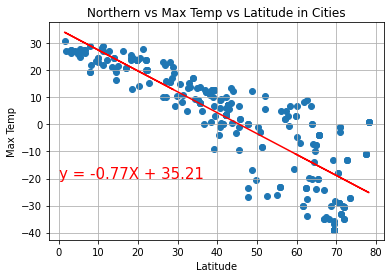

In [54]:

plt.scatter(North_cities["Lat"], North_cities["Max Temp"], marker="o")

#graph properties
plt.title( "Northern vs Max Temp vs Latitude in Cities")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(North_cities["Lat"].astype(float), North_cities["Max Temp"].astype(float))

regress_values = (North_cities["Lat"]) * slope + intercept

#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
print(line_eq)

plt.plot((North_cities["Lat"]), regress_values, color="red")
plt.annotate(line_eq, (0, -20), fontsize=15, color="red")

correlation = stats.pearsonr(North_cities["Lat"], North_cities["Max Temp"])
print(f"The correlation factors is {round(correlation[0],2)}")

plt.savefig("Northern vs Max Temperature_vs_latitude.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.36X + 30.88
The correlation factors is 0.82


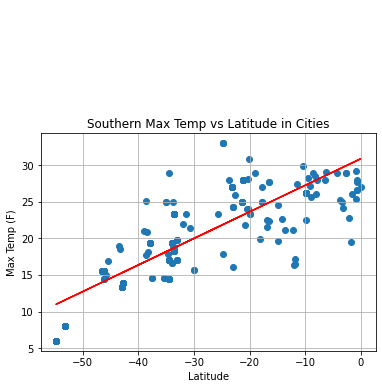

In [55]:
#plot Southern Hemisphere - Max Temperature (F) vs. Latitude

plt.figure()
plt.scatter(South_cities["Lat"], South_cities["Max Temp"], marker="o")

#graph properties
plt.title( "Southern Max Temp vs Latitude in Cities")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(South_cities["Lat"].astype(float), South_cities["Max Temp"].astype(float))

regress_values = (South_cities["Lat"]) * slope + intercept

#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
print(line_eq)

plt.plot((South_cities["Lat"]), regress_values, color="red")
plt.annotate(line_eq, (-40, 50), fontsize=15, color="red")

correlation = stats.pearsonr(South_cities["Lat"], South_cities["Max Temp"])
print(f"The correlation factors is {round(correlation[0],2)}")

plt.savefig("Southern Max Temperature_vs_latitude.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.26X + 61.32
The correlation factors is 0.3


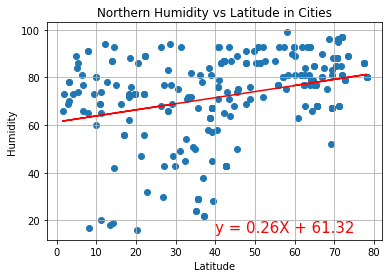

In [56]:
#plot Northern Hemisphere - Humidity vs. Latitude

plt.scatter(North_cities["Lat"], North_cities["Humidity"], marker="o")

#graph properties
plt.title( "Northern Humidity vs Latitude in Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(North_cities["Lat"].astype(float), North_cities["Humidity"].astype(float))

regress_values = (North_cities["Lat"]) * slope + intercept

#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
print(line_eq)

plt.plot((North_cities["Lat"]), regress_values, color="red")
plt.annotate(line_eq, (40, 15), fontsize=15, color="red")

correlation = stats.pearsonr(North_cities["Lat"], North_cities["Humidity"])
print(f"The correlation factors is {round(correlation[0],2)}")

plt.savefig("Northern Humidity_vs_latitude.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.23X + 81.7
The correlation factors is 0.25


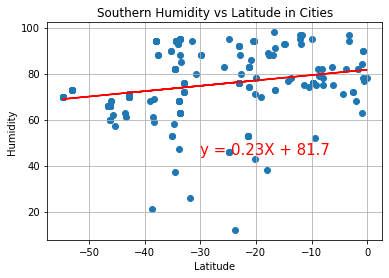

In [57]:
#plot Southern Hemisphere - Humidity vs. Latitude

plt.figure()
plt.scatter(South_cities["Lat"], South_cities["Humidity"], marker="o")

#graph properties
plt.title( "Southern Humidity vs Latitude in Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(South_cities["Lat"].astype(float), South_cities["Humidity"].astype(float))

regress_values = (South_cities["Lat"]) * slope + intercept

#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
print(line_eq)

plt.plot((South_cities["Lat"]), regress_values, color="red")
plt.annotate(line_eq, (-30, 45), fontsize=15, color="red")

correlation = stats.pearsonr(South_cities["Lat"], South_cities["Humidity"])
print(f"The correlation factors is {round(correlation[0],2)}")

plt.savefig("Southern Humidity_vs_latitude.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

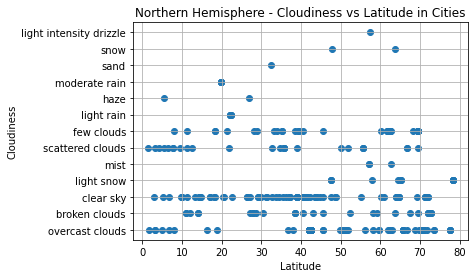

In [58]:

plt.scatter(North_cities["Lat"], North_cities["Cloudiness"], marker="o")

#graph properties
plt.title( "Northern Hemisphere - Cloudiness vs Latitude in Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Northern Cloudiness_vs_latitude.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

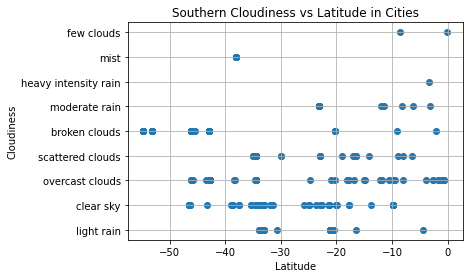

In [59]:


plt.figure()
plt.scatter(South_cities["Lat"], South_cities["Cloudiness"], marker="o")

#graph properties
plt.title( "Southern Cloudiness vs Latitude in Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Southern Cloudiness_vs_latitude.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.01X + 4.9
The correlation factors is -0.1


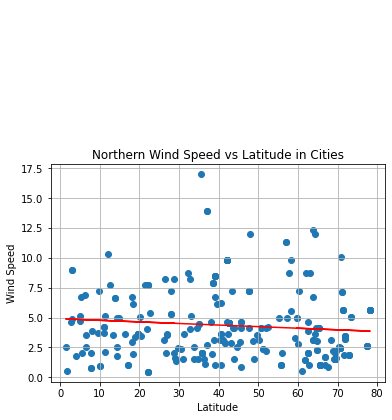

In [60]:

plt.scatter(North_cities["Lat"], North_cities["Wind Speed"], marker="o")

#graph properties
plt.title( "Northern Wind Speed vs Latitude in Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(North_cities["Lat"].astype(float), North_cities["Wind Speed"].astype(float))

regress_values = (North_cities["Lat"]) * slope + intercept

#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
print(line_eq)

plt.plot((North_cities["Lat"]), regress_values, color="red")
plt.annotate(line_eq, (0, 30), fontsize=15, color="red")

correlation = stats.pearsonr(North_cities["Lat"], North_cities["Wind Speed"])
print(f"The correlation factors is {round(correlation[0],2)}")

plt.savefig("Northern Wind Speed_vs_latitude.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.04X + 3.29
The correlation factors is -0.17


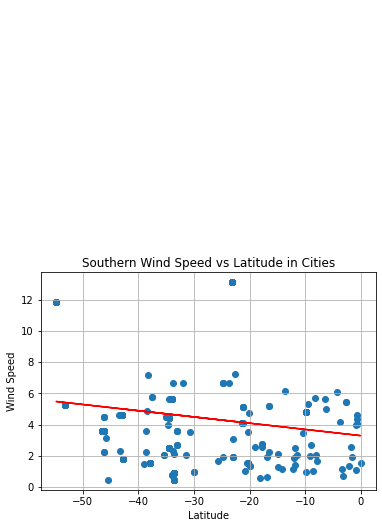

In [61]:
#plot Southern Hemisphere - Wind Speed vs. Latitude

plt.figure()
plt.scatter(South_cities["Lat"], South_cities["Wind Speed"], marker="o")

#graph properties
plt.title( "Southern Wind Speed vs Latitude in Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(South_cities["Lat"].astype(float), South_cities["Wind Speed"].astype(float))

regress_values = (South_cities["Lat"]) * slope + intercept

#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
print(line_eq)

plt.plot((South_cities["Lat"]), regress_values, color="red")
plt.annotate(line_eq, (-40, 30), fontsize=15, color="red")

correlation = stats.pearsonr(South_cities["Lat"], South_cities["Wind Speed"])
print(f"The correlation factors is {round(correlation[0],2)}")

plt.savefig("Southern Wind Speed_vs_latitude.png")

plt.show()